**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [23]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [8]:
#%%pycodestyle
import scipy
from sklearn.neighbors import KDTree


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.algorithm = algorithm
        self.n_neighbors = n_neighbors
        pass

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        if (self.algorithm == 'kd_tree'):
            self.X_train = KDTree(X, metric='euclidean')
        pass

    def predict(self, X):
        if (self.algorithm == 'kd_tree'):
            dist_sort, ind = self.X_train.query(X, k=self.n_neighbors)
            target_class = self.y_train[ind[:, : self.n_neighbors]]
        else:
            dist = scipy.spatial.distance.cdist(X, self.X_train,
                                                metric='euclidean')
            dist_sort = np.argsort(dist, axis=1)
            target_class = self.y_train[dist_sort[:, : self.n_neighbors]]
        predict = scipy.stats.mode(target_class, axis=1)[0]
        predict = np.ravel(predict)
        return predict
        pass

    def predict_proba(self, X):
        if (self.algorithm == 'kd_tree'):
            dist_sort, ind = self.X_train.query(X, k=self.n_neighbors)
            target_class = self.y_train[ind[:, : self.n_neighbors]]
        else:
            dist = scipy.spatial.distance.cdist(X, self.X_train,
                                                metric='euclidean')
            dist_sort = np.argsort(dist, axis=1)
            target_class = self.y_train[dist_sort[:, : self.n_neighbors]]
        strok_prob = np.zeros(shape=(len(target_class),
                                     len(np.unique(self.y_train))))
        for i in range(len(target_class)):
            strok_prob[i] = np.bincount(target_class[i], minlength=len(
                np.unique(self.y_train))) / self.n_neighbors
        return strok_prob
        pass

    def score(self, X, y):
        score = np.mean(my_clf.predict(X) == y)
        return score
        pass

**IRIS**

In [9]:
iris = datasets.load_iris()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [11]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
%time clf.fit(X_train, y_train)

CPU times: user 1.91 ms, sys: 2.7 ms, total: 4.61 ms
Wall time: 8.85 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [14]:
%time my_clf.fit(X_train, y_train)

CPU times: user 259 µs, sys: 202 µs, total: 461 µs
Wall time: 451 µs


In [15]:
%time clf.predict(X_test)

CPU times: user 4.92 ms, sys: 5.83 ms, total: 10.8 ms
Wall time: 11.4 ms


array([2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2])

In [16]:
%time my_clf.predict(X_test)

CPU times: user 3.55 ms, sys: 2.25 ms, total: 5.8 ms
Wall time: 4.56 ms


array([2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2])

In [17]:
%time clf.predict_proba(X_test)

CPU times: user 1.7 ms, sys: 685 µs, total: 2.38 ms
Wall time: 1.9 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
%time my_clf.predict_proba(X_test)

CPU times: user 2.18 ms, sys: 1.44 ms, total: 3.63 ms
Wall time: 2.26 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [19]:
clf.score(X_test, y_test)

0.9333333333333333

In [20]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

Best number is 17


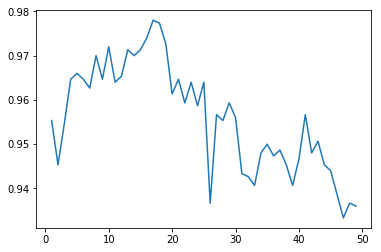

In [22]:
#%%pycodestyle
n_neighbors = 50
test_number = 100
scores = []

for i in range(1, n_neighbors):
    test_score = []
    for j in range(test_number):
        X_train, X_test, y_train, y_test = train_test_split(
            iris.data, iris.target,
            test_size=0.1, stratify=iris.target
        )
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        test_score.append(my_clf.score(X_test, y_test))
    scores.append(np.mean(test_score))

best_n = np.argmax(scores) + 1
print("Best number is {}".format(best_n))

plt.plot(list(range(1, n_neighbors)), scores)
plt.show()

**MNIST**

In [85]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(int)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [87]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [88]:
%time clf.fit(X_train, y_train)

CPU times: user 58.6 s, sys: 873 ms, total: 59.5 s
Wall time: 59.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [89]:
%time my_clf.fit(X_train, y_train)

CPU times: user 22 µs, sys: 66 µs, total: 88 µs
Wall time: 93.2 µs


In [90]:
%time clf.predict(X_test)

CPU times: user 1min 11s, sys: 321 ms, total: 1min 11s
Wall time: 1min 11s


array([7, 6, 0, 9, 1, 9, 1, 2, 9, 7, 6, 8, 8, 8, 1, 0, 5, 8, 7, 8, 1, 2,
       9, 9, 3, 1, 7, 7, 3, 4, 7, 1, 8, 1, 0, 3, 7, 1, 1, 5, 2, 8, 9, 5,
       5, 5, 9, 6, 6, 5, 2, 8, 4, 3, 3, 6, 6, 3, 4, 2, 9, 0, 4, 5, 2, 8,
       1, 4, 6, 2, 3, 3, 4, 2, 6, 7, 8, 5, 0, 7, 6, 0, 4, 4, 0, 3, 8, 3,
       9, 1, 1, 7, 9, 9, 5, 8, 5, 9, 5, 1, 7, 9, 8, 4, 0, 5, 5, 7, 2, 7,
       9, 0, 3, 1, 2, 4, 5, 6, 2, 5, 6, 5, 4, 3, 6, 7, 5, 7, 7, 9, 6, 8,
       0, 4, 6, 9, 9, 7, 2, 2, 6, 7, 3, 4, 5, 2, 8, 3, 6, 9, 1, 0, 4, 1,
       6, 9, 0, 9, 4, 9, 2, 7, 9, 0, 0, 1, 1, 4, 4, 2, 4, 1, 7, 6, 0, 8,
       6, 2, 9, 0, 0, 5, 3, 8, 1, 8, 3, 4, 2, 9, 4, 6, 4, 2, 4, 8, 1, 1,
       5, 4, 0, 1, 6, 4, 1, 7, 2, 8, 2, 8, 1, 0, 6, 3, 7, 3, 9, 5, 2, 2,
       3, 3, 7, 8, 7, 1, 3, 3, 4, 1, 6, 4, 6, 0, 8, 8, 6, 3, 5, 6, 5, 0,
       2, 6, 9, 2, 3, 6, 5, 0, 7, 9, 1, 1, 7, 9, 0, 2, 7, 7, 4, 5, 2, 1,
       6, 7, 4, 9, 2, 6, 3, 1, 9, 1, 2, 9, 6, 4, 4, 7, 4, 1, 6, 5, 0, 6,
       8, 1, 3, 5, 1, 2, 2, 7, 0, 2, 7, 7, 4, 5, 4,

In [91]:
%time my_clf.predict(X_test)

CPU times: user 51.6 s, sys: 1.55 s, total: 53.2 s
Wall time: 53.9 s


array([7, 6, 0, 9, 1, 9, 1, 2, 9, 7, 6, 8, 8, 8, 1, 0, 5, 8, 7, 8, 1, 2,
       9, 9, 3, 1, 7, 7, 3, 4, 7, 1, 8, 1, 0, 3, 7, 1, 1, 5, 2, 8, 9, 5,
       5, 5, 9, 6, 6, 5, 2, 8, 4, 3, 3, 6, 6, 3, 4, 2, 9, 0, 4, 5, 2, 8,
       1, 4, 6, 2, 3, 3, 4, 2, 6, 7, 8, 5, 0, 7, 6, 0, 4, 4, 0, 3, 8, 3,
       9, 1, 1, 7, 9, 9, 5, 8, 5, 9, 5, 1, 7, 9, 8, 4, 0, 5, 5, 7, 2, 7,
       9, 0, 3, 1, 2, 4, 5, 6, 2, 5, 6, 5, 4, 3, 6, 7, 5, 7, 7, 9, 6, 8,
       0, 4, 6, 9, 9, 7, 2, 2, 6, 7, 3, 4, 5, 2, 8, 3, 6, 9, 1, 0, 4, 1,
       6, 9, 0, 9, 4, 9, 2, 7, 9, 0, 0, 1, 1, 4, 4, 2, 4, 1, 7, 6, 0, 8,
       6, 2, 9, 0, 0, 5, 3, 8, 1, 8, 3, 4, 2, 9, 4, 6, 4, 2, 4, 8, 1, 1,
       5, 4, 0, 1, 6, 4, 1, 7, 2, 8, 2, 8, 1, 0, 6, 3, 7, 3, 9, 5, 2, 2,
       3, 3, 7, 8, 7, 1, 3, 3, 4, 1, 6, 4, 6, 0, 8, 8, 6, 3, 5, 6, 5, 0,
       2, 6, 9, 2, 3, 6, 5, 0, 7, 9, 1, 1, 7, 9, 0, 2, 7, 7, 4, 5, 2, 1,
       6, 7, 4, 9, 2, 6, 3, 1, 9, 1, 2, 9, 6, 4, 4, 7, 4, 1, 6, 5, 0, 6,
       8, 1, 3, 5, 1, 2, 2, 7, 0, 2, 7, 7, 4, 5, 4,

In [92]:
%time clf.predict_proba(X_test)

CPU times: user 1min 14s, sys: 572 ms, total: 1min 14s
Wall time: 1min 15s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
%time my_clf.predict_proba(X_test)

CPU times: user 54 s, sys: 1.61 s, total: 55.6 s
Wall time: 56.2 s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
clf.score(X_test, y_test)

0.9671428571428572

In [95]:
my_clf.score(X_test, y_test)

0.9671428571428572

Задание 4

In [364]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [365]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [366]:
%time clf.fit(X_train, y_train)

CPU times: user 57.5 s, sys: 1.06 s, total: 58.5 s
Wall time: 59.1 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [367]:
%time my_clf.fit(X_train, y_train)

CPU times: user 56.3 s, sys: 888 ms, total: 57.2 s
Wall time: 56.5 s


In [370]:
%time clf.predict(X_test)

CPU times: user 1min 34s, sys: 43.7 s, total: 2min 17s
Wall time: 2min 47s


array([7, 9, 4, 3, 3, 5, 9, 9, 6, 7, 3, 4, 1, 9, 8, 8, 0, 0, 0, 4, 7, 3,
       2, 0, 2, 5, 9, 1, 3, 3, 4, 6, 9, 5, 3, 4, 7, 8, 7, 5, 1, 0, 1, 0,
       8, 7, 1, 7, 9, 2, 4, 3, 7, 0, 9, 9, 7, 7, 3, 1, 1, 0, 4, 2, 9, 2,
       8, 5, 6, 8, 8, 1, 6, 2, 0, 5, 0, 4, 7, 6, 8, 2, 3, 2, 3, 4, 7, 9,
       6, 2, 8, 3, 5, 8, 1, 6, 1, 6, 9, 4, 4, 7, 7, 1, 3, 0, 8, 6, 7, 7,
       5, 4, 8, 1, 4, 3, 9, 3, 7, 7, 1, 3, 7, 8, 7, 0, 3, 6, 7, 4, 1, 6,
       6, 7, 4, 3, 5, 9, 1, 8, 6, 1, 7, 1, 2, 4, 3, 9, 4, 1, 4, 6, 4, 9,
       1, 1, 2, 6, 7, 9, 9, 2, 5, 9, 3, 8, 1, 8, 0, 7, 8, 1, 3, 3, 5, 2,
       8, 9, 7, 0, 9, 7, 5, 3, 4, 9, 7, 2, 4, 4, 0, 1, 8, 2, 7, 3, 9, 2,
       0, 7, 4, 4, 8, 9, 7, 8, 6, 4, 6, 5, 8, 5, 8, 5, 4, 3, 1, 5, 3, 1,
       2, 8, 5, 6, 6, 3, 1, 4, 7, 9, 9, 5, 5, 1, 3, 5, 8, 3, 4, 0, 5, 3,
       4, 7, 4, 6, 5, 1, 8, 1, 6, 3, 5, 6, 4, 3, 4, 6, 5, 9, 4, 7, 3, 6,
       2, 4, 4, 9, 7, 6, 0, 6, 1, 3, 8, 6, 3, 4, 8, 3, 0, 4, 7, 8, 9, 0,
       1, 5, 8, 0, 0, 6, 7, 8, 2, 8, 5, 9, 4, 4, 8,

In [371]:
%time my_clf.predict(X_test)

CPU times: user 1min 5s, sys: 4.16 s, total: 1min 9s
Wall time: 1min 14s


array([7, 9, 4, 3, 3, 5, 9, 9, 6, 7, 3, 4, 1, 9, 8, 8, 0, 0, 0, 4, 7, 3,
       2, 0, 2, 5, 9, 1, 3, 3, 4, 6, 9, 5, 3, 4, 7, 8, 7, 5, 1, 0, 1, 0,
       8, 7, 1, 7, 9, 2, 4, 3, 7, 0, 9, 9, 7, 7, 3, 1, 1, 0, 4, 2, 9, 2,
       8, 5, 6, 8, 8, 1, 6, 2, 0, 5, 0, 4, 7, 6, 8, 2, 3, 2, 3, 4, 7, 9,
       6, 2, 8, 3, 5, 8, 1, 6, 1, 6, 9, 4, 4, 7, 7, 1, 3, 0, 8, 6, 7, 7,
       5, 4, 8, 1, 4, 3, 9, 3, 7, 7, 1, 3, 7, 8, 7, 0, 3, 6, 7, 4, 1, 6,
       6, 7, 4, 3, 5, 9, 1, 8, 6, 1, 7, 1, 2, 4, 3, 9, 4, 1, 4, 6, 4, 9,
       1, 1, 2, 6, 7, 9, 9, 2, 5, 9, 3, 8, 1, 8, 0, 7, 8, 1, 3, 3, 5, 2,
       8, 9, 7, 0, 9, 7, 5, 3, 4, 9, 7, 2, 4, 4, 0, 1, 8, 2, 7, 3, 9, 2,
       0, 7, 4, 4, 8, 9, 7, 8, 6, 4, 6, 5, 8, 5, 8, 5, 4, 3, 1, 5, 3, 1,
       2, 8, 5, 6, 6, 3, 1, 4, 7, 9, 9, 5, 5, 1, 3, 5, 8, 3, 4, 0, 5, 3,
       4, 7, 4, 6, 5, 1, 8, 1, 6, 3, 5, 6, 4, 3, 4, 6, 5, 9, 4, 7, 3, 6,
       2, 4, 4, 9, 7, 6, 0, 6, 1, 3, 8, 6, 3, 4, 8, 3, 0, 4, 7, 8, 9, 0,
       1, 5, 8, 0, 0, 6, 7, 8, 2, 8, 5, 9, 4, 4, 8,

In [376]:
%time clf.predict_proba(X_test)

CPU times: user 1min 13s, sys: 1.01 s, total: 1min 14s
Wall time: 1min 14s


array([[0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.5, 0. , 0.5, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [377]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min, sys: 381 ms, total: 1min
Wall time: 1min 1s


array([[0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.5, 0. , 0.5, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [374]:
clf.score(X_test, y_test)

0.9714285714285714

In [375]:
my_clf.score(X_test, y_test)

0.9714285714285714

Задание 5

In [ ]:
# seaborn - библиотека для визуализации данных, онснованная на matplotlib
# matplotlib - библиотека для визуализации данных: построение графиков
# train_test_split - функция из sklearn, необходима для разбиение данных на тренировочную и тестовую части
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - для последовательного преобразования данных
# StandardScaler (from sklearn.preprocessing import StandardScaler) - преобразование данных со
# средним значением 0 и стандартным отклонением 1
# ClassifierMixin - базовый класс для всех классификаторов sklearn
# NeighborsBase - базовый класс для knn
# KNeighborsMixin - класс из sklearn для поиска k ближайших соседей
# SupervisedIntegerMixin - класс sklearn, используемый для рандомизации в fit методе в классе NeighborsBase